In [1]:
#!pip install tensorflow
#!pip install keras

In [2]:
import tensorflow
import keras

In [3]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [4]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

0       600
2731    600
2722    600
675     600
1699    600
       ... 
2379    600
1354    600
2378    600
331     600
2047    600
Name: id, Length: 3125, dtype: int64

In [5]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [6]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


Non-Exercise : 1518 , Exercise : 1607


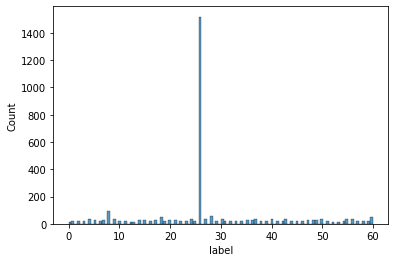

In [35]:
#전체 데이터 분포 - 26번(Non-Exercise가 압도적으로 많음)
sns.histplot(train_labels['label'])

print('Non-Exercise :', len(train_labels[train_labels['label'] == 26]), ', Exercise :',  len(train_labels[train_labels['label'] != 26]))

In [37]:
?sns.histplot

<AxesSubplot:xlabel='label', ylabel='Count'>

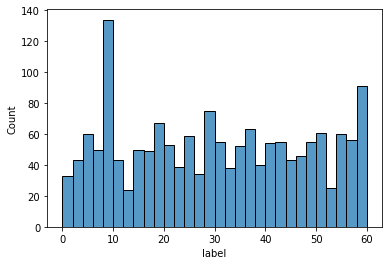

In [39]:
#운동중이 아닌 데이터 제외한 데이터 분포(대체로 고른 분포)

except26 = train_labels[train_labels['label'] != 26]
sns.histplot(except26['label'], bins=30)

<AxesSubplot:>

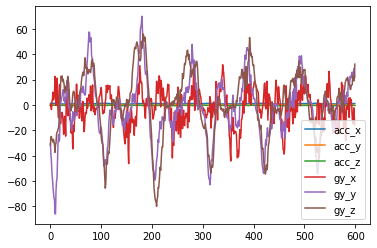

In [9]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

<AxesSubplot:>

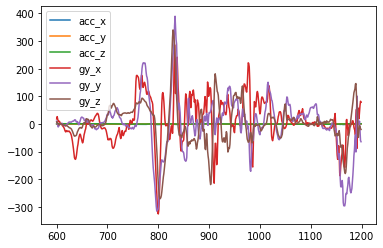

In [10]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

<AxesSubplot:>

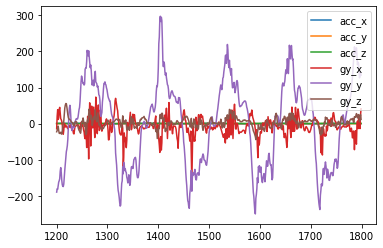

In [11]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

<AxesSubplot:>

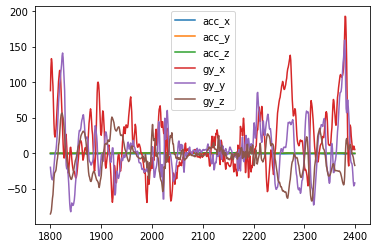

In [12]:
#26 non-exercise
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

<AxesSubplot:>

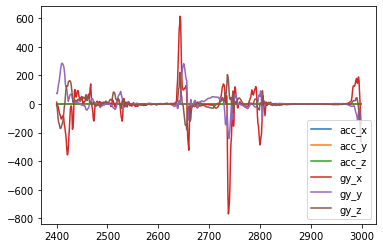

In [13]:
ex=train[train['id']==4]
ex.iloc[:,2:].plot()

In [14]:
train_labels[train_labels['label'] == 2]

,id,label,label_desc
76,76,2,Bicep Curl
119,119,2,Bicep Curl
786,786,2,Bicep Curl
1324,1324,2,Bicep Curl
1440,1440,2,Bicep Curl
1468,1468,2,Bicep Curl
1569,1569,2,Bicep Curl
1612,1612,2,Bicep Curl
1633,1633,2,Bicep Curl
1647,1647,2,Bicep Curl


## 운동별 움직임 패턴 확인

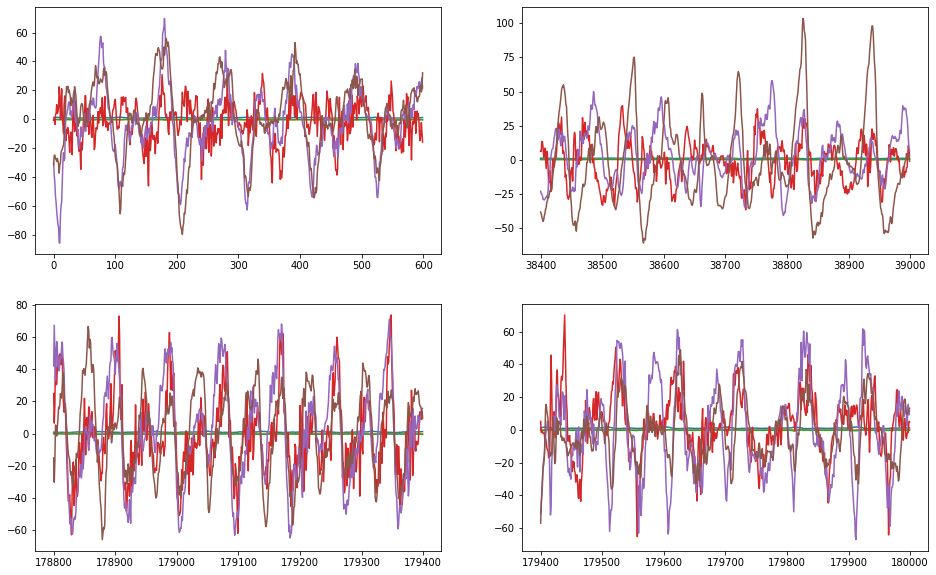

In [15]:
#37번 운동 - Shoulder Press (dumbbell)
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(16, 10))

ex1=train[train['id']==0].iloc[:,2:]
ex2=train[train['id']==64].iloc[:,2:]
ex3=train[train['id']==298].iloc[:,2:]
ex4=train[train['id']==299].iloc[:,2:]

ax[0,0].plot(ex1)
ax[0,1].plot(ex2)
ax[1,0].plot(ex3)
ax[1,1].plot(ex4)

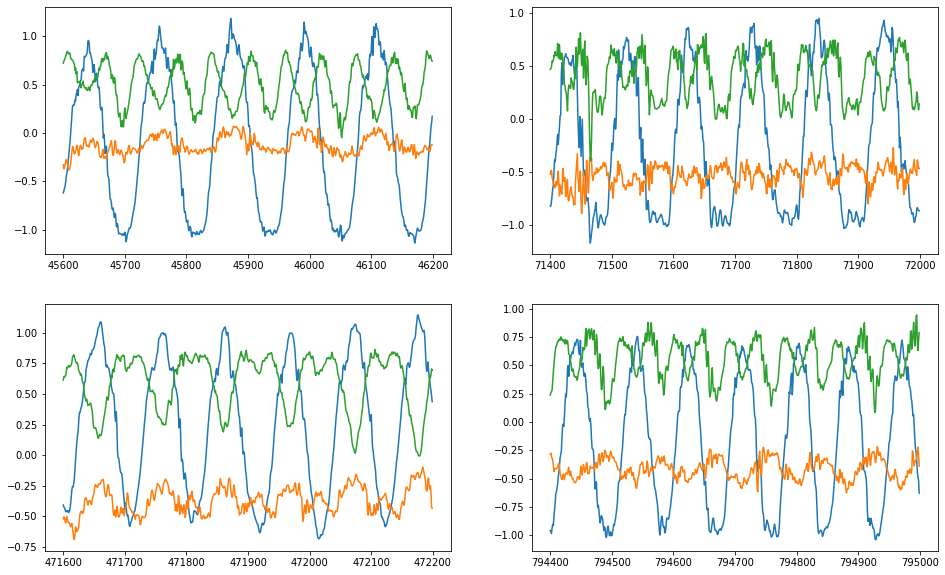

In [16]:
#2번 운동 - Bicep Curl
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(16, 10))
ex1=train[train['id']==76].iloc[:,2:5]
ex2=train[train['id']==119].iloc[:,2:5]
ex3=train[train['id']==786].iloc[:,2:5]
ex4=train[train['id']==1324].iloc[:,2:5]

ax[0,0].plot(ex1)
ax[0,1].plot(ex2)
ax[1,0].plot(ex3)
ax[1,1].plot(ex4)

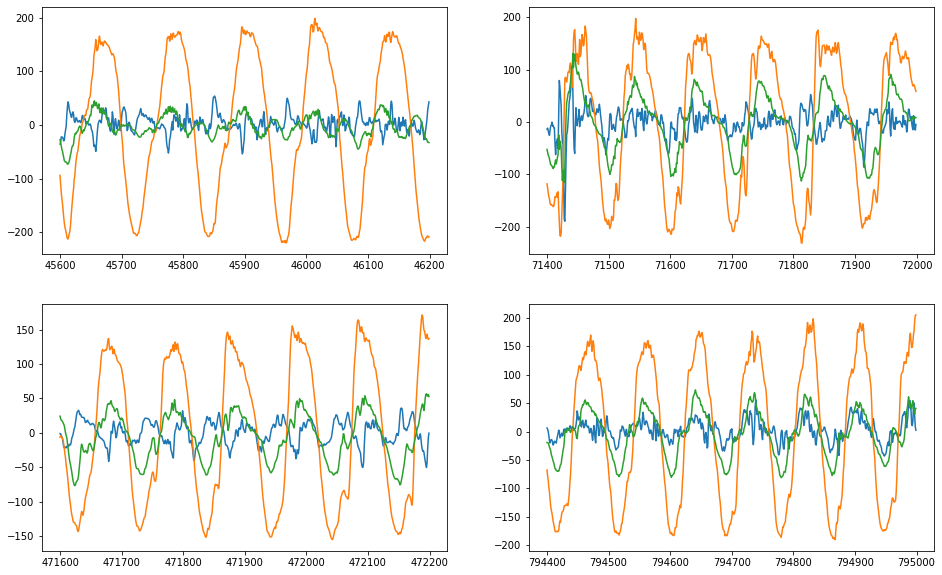

In [17]:
#2번 운동 - Bicep Curl
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(16, 10))
ex1=train[train['id']==76].iloc[:,5:]
ex2=train[train['id']==119].iloc[:,5:]
ex3=train[train['id']==786].iloc[:,5:]
ex4=train[train['id']==1324].iloc[:,5:]

ax[0,0].plot(ex1)
ax[0,1].plot(ex2)
ax[1,0].plot(ex3)
ax[1,1].plot(ex4)

In [18]:
test

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...,...
469195,3906,595,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,596,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,597,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,598,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


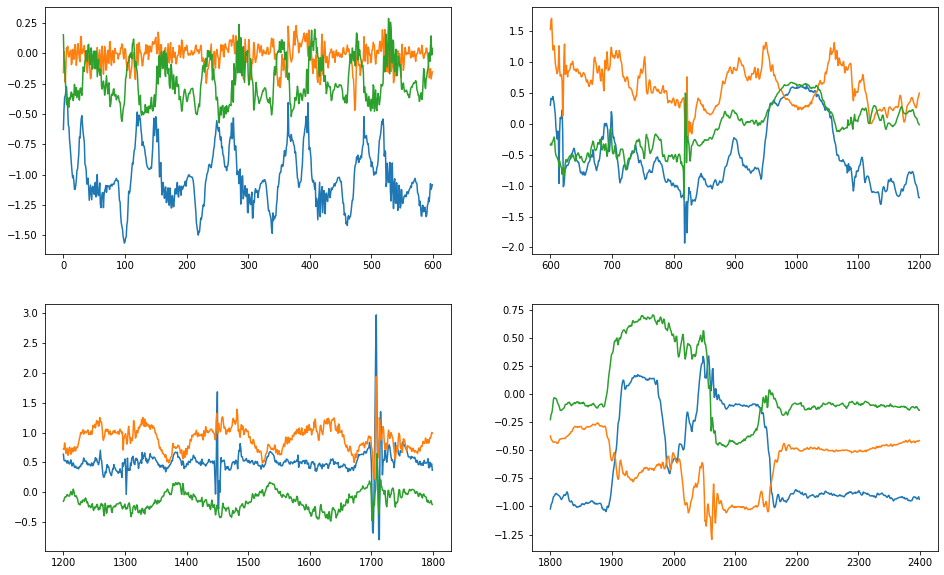

In [19]:
#2번 운동 - Bicep Curl
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(16, 10))
ex1=test[test['id']==3125].iloc[:,2:5]
ex2=test[test['id']==3126].iloc[:,2:5]
ex3=test[test['id']==3127].iloc[:,2:5]
ex4=test[test['id']==3128].iloc[:,2:5]

ax[0,0].plot(ex1)
ax[0,1].plot(ex2)
ax[1,0].plot(ex3)
ax[1,1].plot(ex4)

In [20]:
#test'id'는 782개 
test['id'].nunique()

782

# LSTM - 베이스라인 코드

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [22]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [23]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [24]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 8s 297ms/step - loss: 3.7435 - accuracy: 0.3460 - val_loss: 3.2915 - val_accuracy: 0.4976
Epoch 2/30
20/20 [==============================] - 4s 215ms/step - loss: 3.0095 - accuracy: 0.4828 - val_loss: 2.7616 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 4s 214ms/step - loss: 2.7419 - accuracy: 0.4828 - val_loss: 2.6853 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 5s 239ms/step - loss: 2.6763 - accuracy: 0.4828 - val_loss: 2.6476 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 4s 223ms/step - loss: 2.6218 - accuracy: 0.4828 - val_loss: 2.6154 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 4s 214ms/step - loss: 2.5640 - accuracy: 0.4828 - val_loss: 2.5737 - val_accuracy: 0.4992
Epoch 7/30
20/20 [==============================] - 4s 219ms/step - loss: 2.5111 - accuracy: 0.4852 - val_loss: 2.5435 - val_accuracy: 0.5088
Epoch 

In [26]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [27]:
prediction=model.predict(test_X)
prediction.shape

(782, 61)

In [28]:
submission.iloc[:,1:]=prediction
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.001836,0.014593,0.000077,0.001101,0.024268,0.002131,0.010678,0.003076,0.000823,...,0.002240,0.002358,0.000112,0.002901,0.000518,0.001539,0.012229,0.001244,0.004586,0.001801
1,3126,0.001706,0.024005,0.000724,0.003887,0.010828,0.004916,0.005391,0.005548,0.002257,...,0.001139,0.000514,0.001462,0.014445,0.001105,0.006684,0.016443,0.006249,0.009007,0.000900
2,3127,0.002254,0.015293,0.000212,0.000081,0.048239,0.011077,0.008056,0.052808,0.000267,...,0.001695,0.001134,0.000101,0.000486,0.000332,0.005557,0.004466,0.007276,0.003151,0.000182
3,3128,0.001225,0.004620,0.000239,0.002724,0.004765,0.000981,0.001060,0.014225,0.005576,...,0.001195,0.001117,0.000125,0.001772,0.001018,0.000789,0.010825,0.002075,0.010646,0.006608
4,3129,0.000490,0.001454,0.000266,0.000066,0.005189,0.002541,0.000422,0.000473,0.000677,...,0.006428,0.001837,0.000022,0.000042,0.000462,0.000442,0.001545,0.004350,0.001027,0.002931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.003001,0.002389,0.004180,0.007775,0.014599,0.025243,0.008706,0.002946,0.000427,...,0.009308,0.002713,0.001922,0.011611,0.013425,0.010856,0.031448,0.021586,0.010970,0.004530
778,3903,0.007223,0.004215,0.000451,0.000769,0.007638,0.002465,0.006977,0.003706,0.004814,...,0.004376,0.002252,0.000108,0.000641,0.002192,0.001649,0.003586,0.006521,0.017686,0.005829
779,3904,0.004221,0.011741,0.000777,0.001266,0.043854,0.010743,0.011117,0.009100,0.000368,...,0.010535,0.004637,0.000329,0.001030,0.000839,0.003187,0.013315,0.010666,0.007992,0.001215
780,3905,0.001187,0.003200,0.023286,0.040571,0.006151,0.005673,0.000743,0.001746,0.000123,...,0.019705,0.000040,0.005866,0.033816,0.015110,0.002155,0.011072,0.009834,0.016766,0.000300


In [29]:
submission.to_csv('baseline_submission.csv', index=False)

# SVM

[sklearn을 사용한 SVM(Support Vector Machine) 분류 - 코드복붙불가](https://liveyourit.tistory.com/62)

[SVM(Support Vector Machine) 코드&시각화](https://jeongmin-lee.tistory.com/87)

[SVM 분류 문제를 통해 배우는 머신러닝 훈련 및 테스트](https://bskyvision.com/851)

In [30]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [31]:
ex=train[train['id']==2].iloc[:,2:]
ex

,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
1200,0.241388,-0.437876,0.797198,-14.079567,-189.616276,-22.517136
1201,0.244968,-0.291248,0.812055,20.638647,-180.351215,-18.886615
1202,0.280799,-0.034401,0.779015,38.503247,-181.736547,-11.585759
1203,0.469512,-0.119592,0.850216,11.571927,-171.468835,-7.098493
1204,0.470524,-0.314257,0.837511,15.407564,-161.928446,-18.266438
...,...,...,...,...,...,...
1795,-0.292939,-0.030978,0.913029,23.067458,147.478664,18.543651
1796,-0.171387,0.102003,1.027273,-4.353663,126.773098,5.463767
1797,-0.002942,-0.290610,1.065775,-13.693832,132.213194,14.737257
1798,-0.136765,-0.539106,0.938386,23.189100,141.600715,25.081067


In [40]:
from sklearn.svm import SVC

x_train = tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y_train = tf.keras.utils.to_categorical(train_labels['label'])

svm = SVC(kernel='linear')
result = svm.fit(x_train, y_train)
print('학습용 데이터로 측정한 정확도 = %.2f' % result.score(x_train, y_train))

# 시각화
plt.figure(figsize=(8, 5))
mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

ValueError: Found array with dim 3. Estimator expected <= 2.

# Pycaret

[pycaret으로 ML 모델 쉽게 만들기](https://minimin2.tistory.com/137)

[Dacon-Pycaret Classification Tutorial for Beginners](https://dacon.io/codeshare/2428)

[[Machine Learning] pycaret을 사용한 데이터 분석](https://velog.io/@devseunggwan/Machine-Learning-pycaret%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D)

In [41]:
from pycaret.classification import setup
from time import time
import pycaret

In [42]:
x_train = pd.merge(train,train_labels,on='id')
x_train = x_train.groupby(['label','time']).agg('mean').reset_index().drop(columns = ['id'])

cell_start_time = time()
clf = setup(data = x_train, target='label', silent=True)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Description,Value
0,session_id,7934
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(36600, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


CELL RUN TIME :  1.5709397792816162


In [43]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [45]:
x_train = pd.merge(train,train_labels,on='id')
x_train = x_train.groupby(['label','time']).agg('mean')
x_train

id     acc_x     acc_y     acc_z       gy_x       gy_y  \
label time                                                                    
0     0     1819.000000 -0.018855 -0.158359 -0.469712  32.898119  31.588029   
      1     1819.000000 -0.032910 -0.131694 -0.460082  36.167350  39.454494   
      2     1819.000000 -0.082682 -0.121442 -0.427810  66.688907  31.789400   
      3     1819.000000 -0.045584 -0.141294 -0.398812  82.502404  33.374651   
      4     1819.000000 -0.012182 -0.155831 -0.392536  63.222042  30.225894   
...                 ...       ...       ...       ...        ...        ...   
60    595   1735.458333 -0.771265 -0.125175  0.062823  -2.641541   0.233547   
      596   1735.458333 -0.768061 -0.130795  0.062521  -2.951559   0.291918   
      597   1735.458333 -0.765075 -0.134242  0.064825  -2.895648   0.081520   
      598   1735.458333 -0.762699 -0.133309  0.065547  -3.040967   0.256278   
      599   1735.458333 -0.761196 -0.134838  0.066031  -3.017052   0.681619   

                 gy_z  
label time             
0     0     -2.628256  
      1    -10.947721  
      2     -5.956459  
      3      0.172182  
      4      0.626591  
...               ...  
60    595    0.950649  
      596    0.498571  
      597    0.030092  
      598   -0.115759  
      599   -0.139791  

[36600 rows x 7 columns]

In [46]:
cell_start_time = time()
top5_models = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

top5_models

NameError: name 'compare_models' is not defined

In [47]:
clf1 = setup(x_train, target='label', session_id=123, log_experiment=True, experiment_name='exam_juice')

ValueError: Target parameter: label does not exist in the data provided.

In [48]:
# 앙상블 모델

dt = create_model('dt')
bagged_dt = ensemble_model(dt) # 배깅
boosted_dt = ensemble_model(dt, method='Boosting') # 부스팅

NameError: name 'create_model' is not defined

In [49]:
# 블랜딩 앙상블

blender = blend_models(estimator_list= [boosted_dt, bagged_dt, tuned_lr], method='soft')

NameError: name 'blend_models' is not defined

In [50]:
# 스태킹 앙상블

stacker = stack_models(estimator_list=[boosted_dt, bagged_dt, tuned_rf], meta_model=rf)

NameError: name 'stack_models' is not defined

In [51]:
model.plot_model(lr)

AttributeError: 'Sequential' object has no attribute 'plot_model'

In [52]:
plot_model(lr, plot='confusion_matrix')

NameError: name 'plot_model' is not defined

In [53]:
catboost = create_model('catboost', cross_validation=False)
interpret_model(catboost)

NameError: name 'create_model' is not defined

In [54]:
interpret_model(catboost, plot='correlation')

NameError: name 'interpret_model' is not defined